# Keras with TensorFlow Course - Code Along
DeepLizard.com
Link - https://www.youtube.com/watch?v=qFJeN9V1ZsI

# Convolutional Neural Networks

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category='FutureWarning')
%matplotlib inline

## Data Preparation

In [2]:
#Organize data into train,test and dev sets

os.chdir('datasets/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c,'train/cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')

In [3]:
os.chdir('../../')

In [4]:
train_path = 'datasets/dogs-vs-cats/train'
valid_path = 'datasets/dogs-vs-cats/valid'
test_path = 'datasets/dogs-vs-cats/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'], batch_size=10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
#Batch Size is 10,, so this will just return 10 images with 10 corresponding labels
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

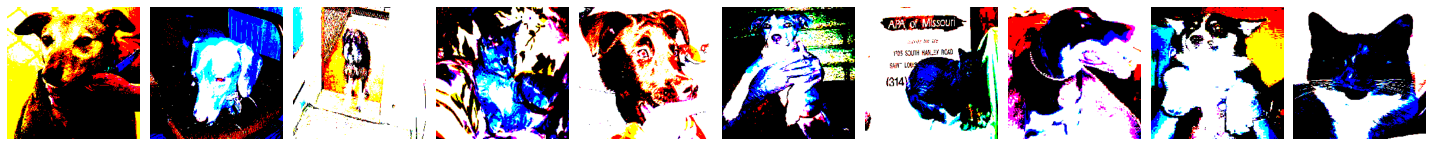

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [8]:
plotImages(imgs)
print(labels)

## Build and Train a CNN

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2),strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 59s - loss: 16.7494 - accuracy: 0.5560 - val_loss: 10.7782 - val_accuracy: 0.5400
Epoch 2/10
100/100 - 52s - loss: 2.8306 - accuracy: 0.7400 - val_loss: 4.6393 - val_accuracy: 0.5800
Epoch 3/10
100/100 - 56s - loss: 0.6101 - accuracy: 0.8860 - val_loss: 2.1380 - val_accuracy: 0.6600
Epoch 4/10
100/100 - 61s - loss: 0.1975 - accuracy: 0.9510 - val_loss: 2.7177 - val_accuracy: 0.6250
Epoch 5/10
100/100 - 56s - loss: 0.0638 - accuracy: 0.9800 - val_loss: 2.3920 - val_accuracy: 0.6600
Epoch 6/10
100/100 - 63s - loss: 0.0343 - accuracy: 0.9840 - val_loss: 2.3011 - val_accuracy: 0.6750
Epoch 7/10
100/100 - 54s - loss: 0.0062 - accuracy: 0.9960 - val_loss: 2.3361 - val_accuracy: 0.6750
Epoch 8/10
100/100 - 58s - loss: 8.8767e-04 - accuracy: 1.0000 - val_loss: 2.3336 - val_accuracy: 0.6650
Epoch 9/10
100/100 - 61s - loss: 3.8937e-04 - accuracy: 1.0000 - val_loss: 2.3211 - val_accuracy: 0.6650
Epoch 10/10
100/100 - 61s - loss: 2.8681e-04 - accuracy: 1.0000 - val_loss: 2.323

## There is overfitting of training data

## Predict on test data

In [13]:
predictions = model.predict(x=test_batches, verbose=0)

In [14]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [16]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis=-1))

In [17]:
cm

array([[26, 24],
       [ 6, 44]])

In [27]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

## Fine tuning using pre-trained VGG16 model

In [28]:
# Download model
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 144s 0us/step


In [29]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [31]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [32]:
#Only the last layer has not been included
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [33]:
for layer in model.layers:
    layer.trainable = False

In [34]:
model.add(Dense(units=2, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Train the fine tuned VGG-16 Model

In [36]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 367s - loss: 0.3940 - accuracy: 0.8310 - val_loss: 0.1061 - val_accuracy: 0.9650
Epoch 2/5
100/100 - 393s - loss: 0.1116 - accuracy: 0.9590 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 3/5


KeyboardInterrupt: 

In [ ]:
assert model.history.history.get('accuracy')[-1] > 0.95